<a href="https://colab.research.google.com/github/ayodelenaomii/ayodelenaomii/blob/main/FAULT_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np




Importing data from drive.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
Data = pd.read_excel('/content/drive/MyDrive/TCN DATA (1).xlsx')
Data

,Highest Frequency,Lowest Frequency,Highest Voltage,Lowest Voltage,PEAK GENERATION,LOWEST GENERATION,INTERRUPTED POWER,EQUIPMENT HEALTH,WEATHER CONDITION,FAULTS,TRANSMISSION LINE
0,50.000,49.00,349.0,300.0,4531.50,3784.70,414,Nil,RAINFALL,YES,Omotosho/Ikeja-West 330kV line
1,50.847,49.01,349.0,300.0,4482.50,3955.47,Nil,Nil,RAINFALL,Nil,Nil
2,50.983,49.01,358.0,300.0,4579.60,3231.80,Nil,POWER TRANSFORMER,RAINFALL,Nil,Nil
3,50.960,49.01,353.0,300.0,4552.76,3890.10,483.7,CIRCUIT BREAKER,RAINFALL,YES,Osogbo/Ikeja-West 330kV line
4,50.820,49.01,355.0,300.0,4204.80,3929.00,373.8,Nil,RAINFALL,YES,Shiroro/Katampe 330kV line
...,...,...,...,...,...,...,...,...,...,...,...
360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
363,NaN,NaN,NaN,NaN,19798.00,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# prompt: Using dataframe Data: Scatter

import altair as alt
chart = alt.Chart(Data).mark_circle().encode(x='Highest Frequency ', y='Lowest Frequency').interactive()
chart


/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: Futu

alt.Chart(...)

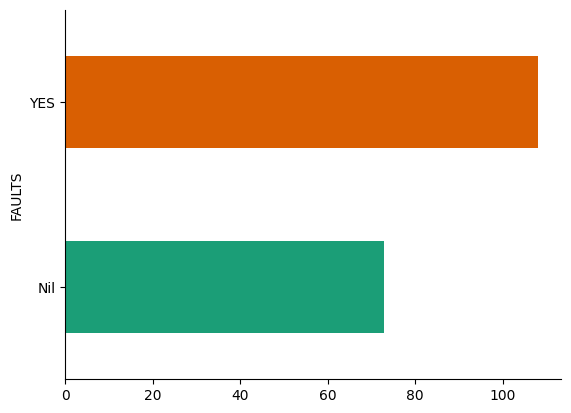

In [5]:
# @title FAULTS

from matplotlib import pyplot as plt
import seaborn as sns
Data.groupby('FAULTS').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)


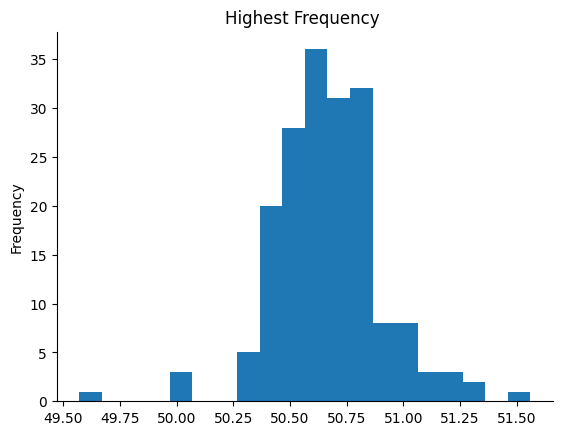

In [6]:
# @title Highest Frequency

from matplotlib import pyplot as plt
Data['Highest Frequency '].plot(kind='hist', bins=20, title='Highest Frequency ')
plt.gca().spines[['top', 'right',]].set_visible(False)

Removing NaN

In [7]:
data = Data.dropna()

EDA


In [8]:

data.shape

(179, 11)

In [9]:
data.isnull().sum

<bound method DataFrame.sum of      Highest Frequency   Lowest Frequency  Highest Voltage  Lowest Voltage  \
0                 False             False            False           False   
1                 False             False            False           False   
2                 False             False            False           False   
3                 False             False            False           False   
4                 False             False            False           False   
..                  ...               ...              ...             ...   
177               False             False            False           False   
178               False             False            False           False   
179               False             False            False           False   
180               False             False            False           False   
181               False             False            False           False   

     PEAK GENERATION  LOWEST GENERATION  INTERRUPTED POWER  EQUIPMENT HEALTH  \
0              False              False              False             False   
1              False              False              False             False   
2              False              False              False             False   
3              False              False              False             False   
4              False              False              False             False   
..               ...                ...                ...               ...   
177            False              False              False             False   
178            False              False              False             False   
179            False              False              False             False   
180            False              False              False             False   
181            False              False              False             False   

     WEATHER CONDITION  FAULTS  TRANSMISSION LINE  
0                False   False              False  
1                False   False              False  
2                False   False              False  
3                False   False              False  
4                False   False              False  
..                 ...     ...                ...  
177              False   False              False  
178              False   False              False  
179              False   False              False  
180              False   False              False  
181              False   False              False  

[179 rows x 11 columns]>

In [10]:
data['INTERRUPTED POWER'].value_counts()

,count
INTERRUPTED POWER,
Nil,43
337,2
114,2
360.3,1
341,1
...,...
27.1,1
137.9,1
117,1


In [11]:
data['INTERRUPTED POWER'] = data['INTERRUPTED POWER'].replace('Nil', np.nan)

<ipython-input-11-b05a2b1fd7cb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['INTERRUPTED POWER'] = data['INTERRUPTED POWER'].replace('Nil', np.nan)


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 179 entries, 0 to 181
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Highest Frequency   179 non-null    float64
 1   Lowest Frequency    179 non-null    float64
 2   Highest Voltage     179 non-null    float64
 3   Lowest Voltage      179 non-null    float64
 4   PEAK GENERATION     179 non-null    float64
 5   LOWEST GENERATION   179 non-null    float64
 6   INTERRUPTED POWER   136 non-null    object 
 7   EQUIPMENT HEALTH    179 non-null    object 
 8   WEATHER CONDITION   179 non-null    object 
 9   FAULTS              179 non-null    object 
 10  TRANSMISSION LINE   179 non-null    object 
dtypes: float64(6), object(5)
memory usage: 16.8+ KB


In [13]:
data['INTERRUPTED POWER'] = data['INTERRUPTED POWER'].replace('1`056.8', np.nan).astype(float)
data['INTERRUPTED POWER'] = data['INTERRUPTED POWER'].replace('1`056.8', 0.0).astype(float)
data['EQUIPMENT HEALTH'] = data['EQUIPMENT HEALTH'].astype(str)
data['WEATHER CONDITION'] = data['WEATHER CONDITION'].astype(str)
data['FAULTS'] = data['FAULTS'].astype(str)
data['TRANSMISSION LINE'] = data['TRANSMISSION LINE'].astype(str)

<ipython-input-13-24223408b6df>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['INTERRUPTED POWER'] = data['INTERRUPTED POWER'].replace('1`056.8', np.nan).astype(float)
<ipython-input-13-24223408b6df>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['INTERRUPTED POWER'] = data['INTERRUPTED POWER'].replace('1`056.8', np.nan).astype(float)
<ipython-input-13-24223408b6df>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [14]:
data
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 179 entries, 0 to 181
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Highest Frequency   179 non-null    float64
 1   Lowest Frequency    179 non-null    float64
 2   Highest Voltage     179 non-null    float64
 3   Lowest Voltage      179 non-null    float64
 4   PEAK GENERATION     179 non-null    float64
 5   LOWEST GENERATION   179 non-null    float64
 6   INTERRUPTED POWER   135 non-null    float64
 7   EQUIPMENT HEALTH    179 non-null    object 
 8   WEATHER CONDITION   179 non-null    object 
 9   FAULTS              179 non-null    object 
 10  TRANSMISSION LINE   179 non-null    object 
dtypes: float64(7), object(4)
memory usage: 16.8+ KB


Normalization.


In [15]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Separate numeric and string columns
numeric_columns = data.select_dtypes(include=['float64']).columns
string_columns = data.select_dtypes(include=['object']).columns

# Create a copy of the original data to avoid modifying the original
data_normalized = data.copy()

# Normalize numeric columns
scaler = MinMaxScaler()
data_normalized[numeric_columns] = scaler.fit_transform(data_normalized[numeric_columns])

# Encode string columns using custom LabelEncoder with specified mapping
label_encoder_mapping = {}

for col in string_columns:
    data_normalized[col] = data_normalized[col].str.lower()
    label_encoder = LabelEncoder()
    data_normalized[col] = label_encoder.fit_transform(data_normalized[col])
    # Map 'nil' to 0 and other labels to consecutive numbers starting from 1
    data_normalized[col] = data_normalized[col].where(data_normalized[col] == 0, other=data_normalized[col]  )
    label_encoder_mapping[col] = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))

# Verify the changes
print(data_normalized.head())
print(label_encoder_mapping)


   Highest Frequency   Lowest Frequency  Highest Voltage  Lowest Voltage  \
0            0.215292          0.713749         0.700000        0.440994   
1            0.641348          0.717506         0.700000        0.440994   
2            0.709759          0.717506         0.828571        0.440994   
3            0.698189          0.717506         0.757143        0.440994   
4            0.627767          0.717506         0.785714        0.440994   

   PEAK GENERATION  LOWEST GENERATION  INTERRUPTED POWER  EQUIPMENT HEALTH  \
0         0.575111           0.784992           0.239303                 9   
1         0.544167           0.820759                NaN                 9   
2         0.605487           0.669191                NaN                10   
3         0.588537           0.807067           0.279660                 2   
4         0.368799           0.815215           0.216027                 9   

   WEATHER CONDITION  FAULTS  TRANSMISSION LINE  
0                  1    



Feature Selection for Mutual information


In [16]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

# Assuming data_normalized is your DataFrame
# Remove samples with missing values from the target data
y = data_normalized['FAULTS'].dropna()

# Drop the target column from X temporarily to handle missing values
X = data_normalized.drop('FAULTS', axis=1)

# Use SimpleImputer to fill missing values with the mean (you can choose another strategy)
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Select 4 best features using Mutual Information
selector = SelectKBest(mutual_info_classif, k=4)
X_selected = selector.fit_transform(X_imputed, y)

# Get the names of selected features
selected_feature_names = X_imputed.columns[selector.get_support()].tolist()

# Get the scores for all features
feature_scores = selector.scores_

# Create a DataFrame to display feature names and their scores
feature_scores_df = pd.DataFrame({
    'Feature': X_imputed.columns,
    'Score': feature_scores
})

# Sort the DataFrame by scores in descending order
feature_scores_df = feature_scores_df.sort_values(by='Score', ascending=False)

# Print the scores for every feature
print("Feature Scores:")
print(feature_scores_df)

# Print the names of selected features
print("\nSelected Features:")
print(selected_feature_names)




Feature Scores:
              Feature     Score
9   TRANSMISSION LINE  0.586595
6   INTERRUPTED POWER  0.249963
7    EQUIPMENT HEALTH  0.053821
8   WEATHER CONDITION  0.051793
5   LOWEST GENERATION  0.029694
2     Highest Voltage  0.025574
4     PEAK GENERATION  0.015158
3      Lowest Voltage  0.015079
0  Highest Frequency   0.000000
1    Lowest Frequency  0.000000

Selected Features:
['INTERRUPTED POWER', 'EQUIPMENT HEALTH', 'WEATHER CONDITION', 'TRANSMISSION LINE']


Data Splitting


In [17]:
from sklearn.model_selection import train_test_split


# Split the data into training (70%) and temp (30%)
X_train, X_test , y_train, y_test = train_test_split(X_imputed[selected_feature_names], y, test_size=0.3, random_state=42)

# Further split the temp data into validation (15%) and test (15%)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# Display the shape of the training, validation, and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Testing set shape:", X_test.shape, y_test.shape)



Training set shape: (125, 4) (125,)
Validation set shape: (27, 4) (27,)
Testing set shape: (27, 4) (27,)


In [18]:
X_train, X_test,X_val, y_train, y_test, y_val


(     INTERRUPTED POWER  EQUIPMENT HEALTH  WEATHER CONDITION  TRANSMISSION LINE
 124           0.199931               9.0                1.0               11.0
 60            0.170343               9.0                1.0               62.0
 26            0.049389               2.0                0.0               19.0
 154           0.147820              10.0                0.0               44.0
 96            0.510393               9.0                1.0               53.0
 ..                 ...               ...                ...                ...
 71            0.170207               9.0                1.0               44.0
 106           0.114238               9.0                1.0               56.0
 14            0.170207               9.0                1.0               23.0
 92            0.170207               2.0                1.0               44.0
 102           0.104974               6.0                1.0               23.0
 
 [125 rows x 4 columns],
      INTERRU

Model Selection and Model Training

KNN MODEL

In [19]:
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification
import warnings


# Apply PCA to reduce dimensionality
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Define the parameter grids for each model
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

param_grid_lda = {
    'solver': ['lsqr', 'eigen'],  # Removed 'svd' solver as it doesn't support shrinkage
    'shrinkage': [None, 'auto', 0.5, 1.0]
}

param_grid_qda = {
    'reg_param': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
}

# Initialize the models
knn = KNeighborsClassifier()
lda = LinearDiscriminantAnalysis()
qda = QuadraticDiscriminantAnalysis()

# Initialize GridSearchCV for each model
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy', error_score='raise')
grid_search_lda = GridSearchCV(lda, param_grid_lda, cv=5, scoring='accuracy', error_score='raise')
grid_search_qda = GridSearchCV(qda, param_grid_qda, cv=5, scoring='accuracy', error_score='raise')

# Fit GridSearchCV for each model
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=UserWarning)
    grid_search_knn.fit(X_train_pca, y_train)
    grid_search_lda.fit(X_train_pca, y_train)
    grid_search_qda.fit(X_train_pca, y_train)

# Print the best parameters and best score for each model
print("Best parameters for KNN:", grid_search_knn.best_params_)
print("Best cross-validation accuracy for KNN:", grid_search_knn.best_score_)

print("Best parameters for LDA:", grid_search_lda.best_params_)
print("Best cross-validation accuracy for LDA:", grid_search_lda.best_score_)

print("Best parameters for QDA:", grid_search_qda.best_params_)
print("Best cross-validation accuracy for QDA:", grid_search_qda.best_score_)

# Evaluate the best models on the test set
best_knn = grid_search_knn.best_estimator_
best_lda = grid_search_lda.best_estimator_
best_qda = grid_search_qda.best_estimator_

print("Test set accuracy for best KNN:", best_knn.score(X_test_pca, y_test))
print("Test set accuracy for best LDA:", best_lda.score(X_test_pca, y_test))
print("Test set accuracy for best QDA:", best_qda.score(X_test_pca, y_test))


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters for KNN: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
Best cross-validation accuracy for KNN: 0.96
Best parameters for LDA: {'shrinkage': None, 'solver': 'lsqr'}
Best cross-validation accuracy for LDA: 0.42400000000000004
Best parameters for QDA: {'reg_param': 0.0}
Best cross-validation accuracy for QDA: 0.968
Test set accuracy for best KNN: 0.9629629629629629
Test set accuracy for best LDA: 0.4444444444444444
Test set accuracy for best QDA: 0.9629629629629629


In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

# Best parameters from GridSearchCV
best_params_knn = {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
best_params_lda = {'shrinkage': None, 'solver': 'lsqr'}
best_params_qda = {'reg_param': 0.0}

# Initialize models with best parameters
best_knn = KNeighborsClassifier(**best_params_knn)
best_lda = LinearDiscriminantAnalysis(**best_params_lda)
best_qda = QuadraticDiscriminantAnalysis(**best_params_qda)

# Fit the models on the training data
best_knn.fit(X_train_pca, y_train)
best_lda.fit(X_train_pca, y_train)
best_qda.fit(X_train_pca, y_train)

# Evaluate on the test set
test_accuracy_knn = best_knn.score(X_test_pca, y_test)
test_accuracy_lda = best_lda.score(X_test_pca, y_test)
test_accuracy_qda = best_qda.score(X_test_pca, y_test)

# Print test set accuracies
print("Test set accuracy for best KNN:", test_accuracy_knn)
print("Test set accuracy for best LDA:", test_accuracy_lda)
print("Test set accuracy for best QDA:", test_accuracy_qda)


Test set accuracy for best KNN: 0.9629629629629629
Test set accuracy for best LDA: 0.4444444444444444
Test set accuracy for best QDA: 0.9629629629629629


Accuracy of train: 0.91
              precision    recall  f1-score   support

           0       0.81      1.00      0.90        48
           1       1.00      0.86      0.92        77

    accuracy                           0.91       125
   macro avg       0.91      0.93      0.91       125
weighted avg       0.93      0.91      0.91       125

[[48  0]
 [11 66]]
Accuracy of test: 0.89
              precision    recall  f1-score   support

           0       0.77      1.00      0.87        10
           1       1.00      0.82      0.90        17

    accuracy                           0.89        27
   macro avg       0.88      0.91      0.89        27
weighted avg       0.91      0.89      0.89        27

[[10  0]
 [ 3 14]]
Accuracy of validation: 0.93
              precision    recall  f1-score   support

           0       0.88      1.00      0.93        14
           1       1.00      0.85      0.92        13

    accuracy                           0.93        27
   macro avg  

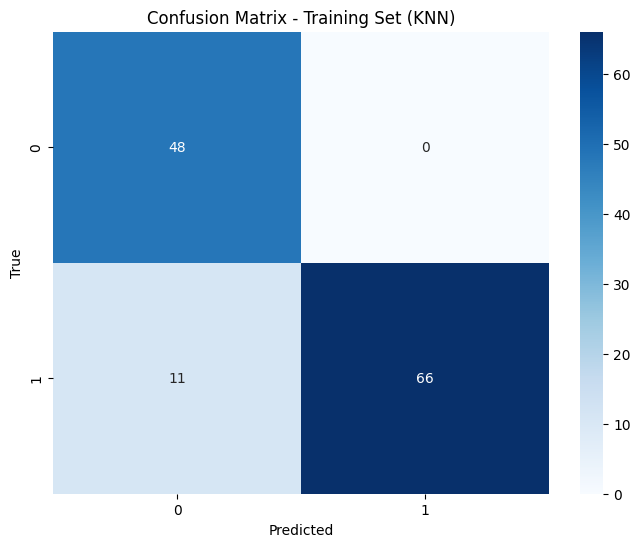

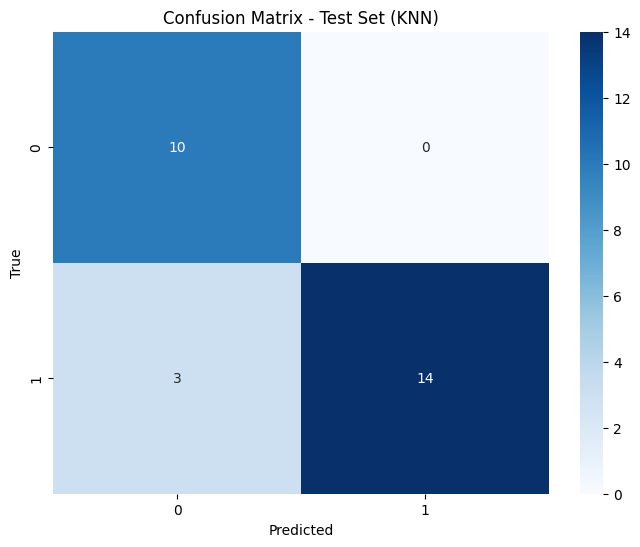

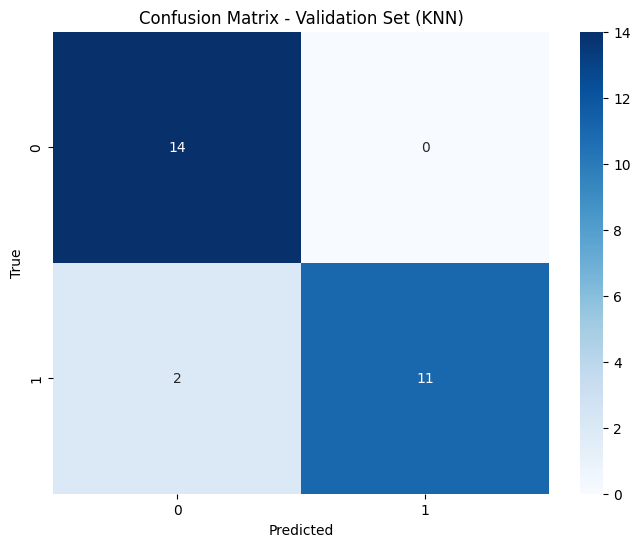

In [22]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()


knn_classifier = KNeighborsClassifier(n_neighbors=13)

# Train the classifier
knn_classifier.fit(X_train, y_train)

# Predict the target variable for the training set
y_pred_train = knn_classifier.predict(X_train)
# Evaluate the accuracy of the model on the training set
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f"Accuracy of train: {accuracy_train:.2f}")
print(classification_report(y_train, y_pred_train))

# Confusion matrix for the training set
confusion_matrix_train = confusion_matrix(y_train, y_pred_train)
print(confusion_matrix_train)

# Predict the target variable for the test set
y_pred_test = knn_classifier.predict(X_test)
# Evaluate the accuracy of the model on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Accuracy of test: {accuracy_test:.2f}")
print(classification_report(y_test, y_pred_test))

# Confusion matrix for the test set
confusion_matrix_test = confusion_matrix(y_test, y_pred_test)
print(confusion_matrix_test)

# Optionally evaluate on the validation set
y_pred_val = knn_classifier.predict(X_val)
accuracy_val = accuracy_score(y_val, y_pred_val)
print(f"Accuracy of validation: {accuracy_val:.2f}")
print(classification_report(y_val, y_pred_val))

# Confusion matrix for the validation set
confusion_matrix_val = confusion_matrix(y_val, y_pred_val)
print(confusion_matrix_val)

# Plot confusion matrices
plot_confusion_matrix(confusion_matrix_train, 'Confusion Matrix - Training Set (KNN)')
plot_confusion_matrix(confusion_matrix_test, 'Confusion Matrix - Test Set (KNN)')
plot_confusion_matrix(confusion_matrix_val, 'Confusion Matrix - Validation Set (KNN)')


KNN CONFUSION MATRIX

LDA MODEL

Accuracy of train: 0.75
              precision    recall  f1-score   support

           0       0.70      0.62      0.66        48
           1       0.78      0.83      0.81        77

    accuracy                           0.75       125
   macro avg       0.74      0.73      0.73       125
weighted avg       0.75      0.75      0.75       125

[[30 18]
 [13 64]]
Accuracy of test: 0.85
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        10
           1       0.88      0.88      0.88        17

    accuracy                           0.85        27
   macro avg       0.84      0.84      0.84        27
weighted avg       0.85      0.85      0.85        27

[[ 8  2]
 [ 2 15]]
Accuracy of validation: 0.63
              precision    recall  f1-score   support

           0       0.70      0.50      0.58        14
           1       0.59      0.77      0.67        13

    accuracy                           0.63        27
   macro avg  

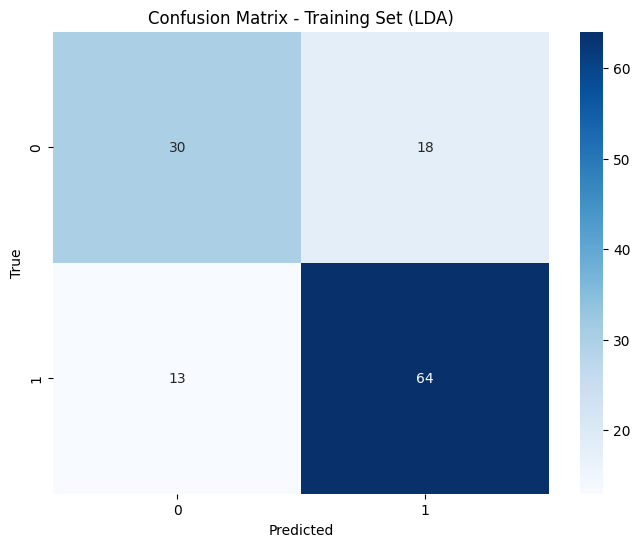

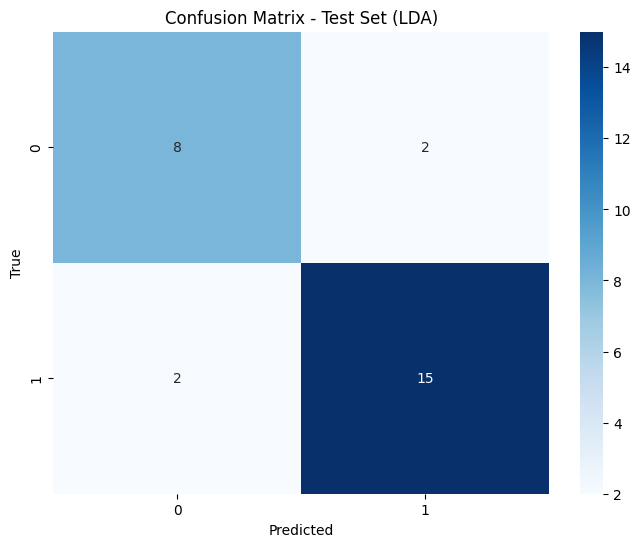

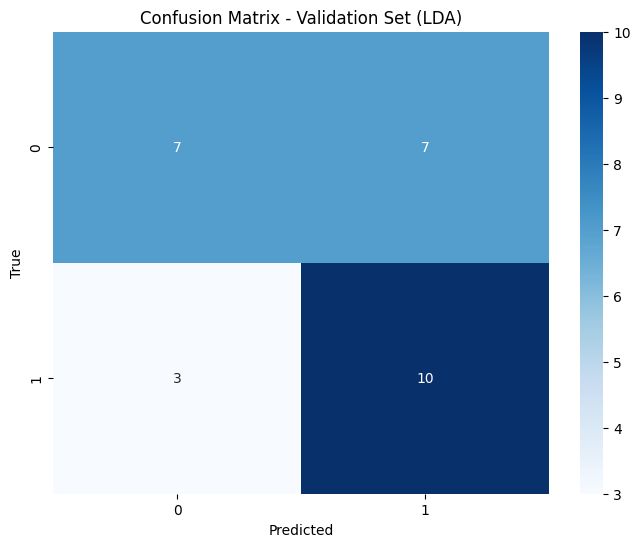

In [23]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()


# Initialize the LDA classifier
lda_classifier = LinearDiscriminantAnalysis()

# Train the classifier
lda_classifier.fit(X_train, y_train)

# Predict the target variable for the training set
y_pred_train = lda_classifier.predict(X_train)
# Evaluate the accuracy of the model on the training set
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f"Accuracy of train: {accuracy_train:.2f}")
print(classification_report(y_train, y_pred_train))

# Confusion matrix for the training set
confusion_matrix_train = confusion_matrix(y_train, y_pred_train)
print(confusion_matrix_train)

# Predict the target variable for the test set
y_pred_test = lda_classifier.predict(X_test)
# Evaluate the accuracy of the model on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Accuracy of test: {accuracy_test:.2f}")
print(classification_report(y_test, y_pred_test))

# Confusion matrix for the test set
confusion_matrix_test = confusion_matrix(y_test, y_pred_test)
print(confusion_matrix_test)

# Optionally evaluate on the validation set
y_pred_val = lda_classifier.predict(X_val)
accuracy_val = accuracy_score(y_val, y_pred_val)
print(f"Accuracy of validation: {accuracy_val:.2f}")
print(classification_report(y_val, y_pred_val))

# Confusion matrix for the validation set
confusion_matrix_val = confusion_matrix(y_val, y_pred_val)
print(confusion_matrix_val)

# Plot confusion matrices
plot_confusion_matrix(confusion_matrix_train, 'Confusion Matrix - Training Set (LDA)')
plot_confusion_matrix(confusion_matrix_test, 'Confusion Matrix - Test Set (LDA)')
plot_confusion_matrix(confusion_matrix_val, 'Confusion Matrix - Validation Set (LDA)')


LDA CONFUSION MATRIX

QDA MODEL

Accuracy of train: 0.98
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        48
           1       0.99      0.97      0.98        77

    accuracy                           0.98       125
   macro avg       0.97      0.98      0.97       125
weighted avg       0.98      0.98      0.98       125

[[47  1]
 [ 2 75]]
Accuracy of test: 0.96
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.94      0.97        17

    accuracy                           0.96        27
   macro avg       0.95      0.97      0.96        27
weighted avg       0.97      0.96      0.96        27

[[10  0]
 [ 1 16]]
Accuracy of validation: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        13

    accuracy                           1.00        27
   macro avg  

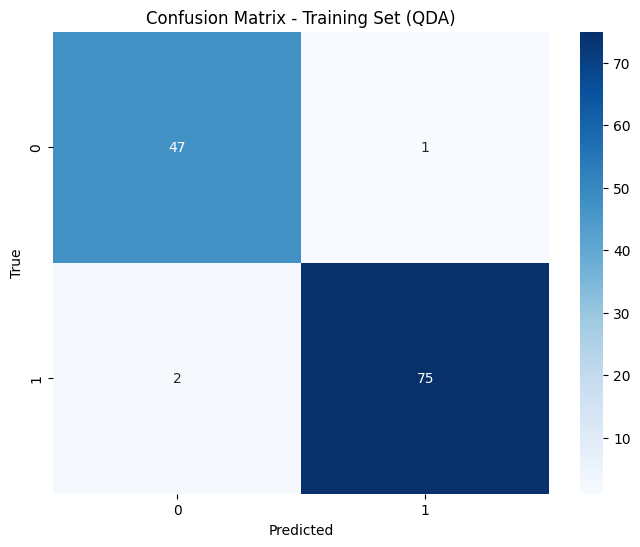

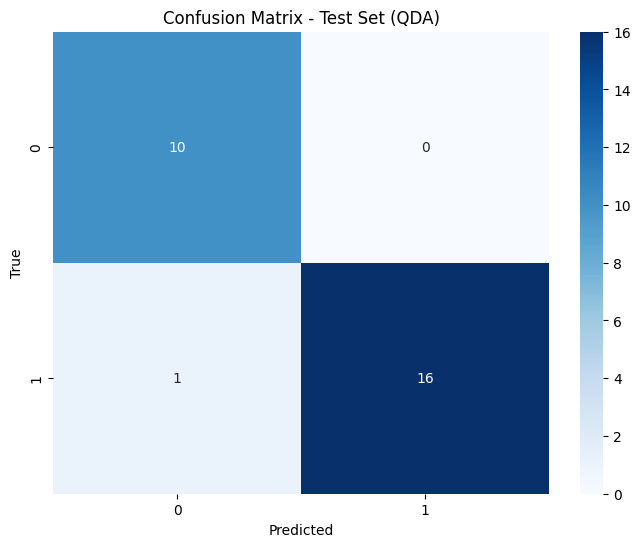

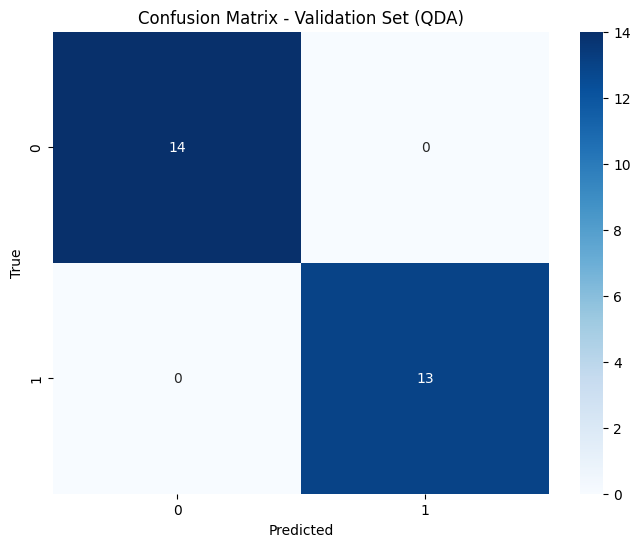

In [24]:
import numpy as np
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()


# Initialize the QDA classifier
qda_classifier = QuadraticDiscriminantAnalysis()

# Train the classifier
qda_classifier.fit(X_train, y_train)

# Predict the target variable for the training set
y_pred_train = qda_classifier.predict(X_train)
# Evaluate the accuracy of the model on the training set
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f"Accuracy of train: {accuracy_train:.2f}")
print(classification_report(y_train, y_pred_train))

# Confusion matrix for the training set
confusion_matrix_train = confusion_matrix(y_train, y_pred_train)
print(confusion_matrix_train)

# Predict the target variable for the test set
y_pred_test = qda_classifier.predict(X_test)
# Evaluate the accuracy of the model on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Accuracy of test: {accuracy_test:.2f}")
print(classification_report(y_test, y_pred_test))

# Confusion matrix for the test set
confusion_matrix_test = confusion_matrix(y_test, y_pred_test)
print(confusion_matrix_test)

# Optionally evaluate on the validation set
y_pred_val = qda_classifier.predict(X_val)
accuracy_val = accuracy_score(y_val, y_pred_val)
print(f"Accuracy of validation: {accuracy_val:.2f}")
print(classification_report(y_val, y_pred_val))

# Confusion matrix for the validation set
confusion_matrix_val = confusion_matrix(y_val, y_pred_val)
print(confusion_matrix_val)

# Plot confusion matrices
plot_confusion_matrix(confusion_matrix_train, 'Confusion Matrix - Training Set (QDA)')
plot_confusion_matrix(confusion_matrix_test, 'Confusion Matrix - Test Set (QDA)')
plot_confusion_matrix(confusion_matrix_val, 'Confusion Matrix - Validation Set (QDA)')




In [25]:

# Initialize the QDA model
qda = QuadraticDiscriminantAnalysis()

# Train the QDA model
qda.fit(X_train, y_train)

def predict_new_target(qda_model, new_features):
    """
    Predict the target for new input features using the trained QDA model.

    Parameters:
    qda_model (QuadraticDiscriminantAnalysis): Trained QDA model.
    new_features (array-like): New input features (numeric values).

    Returns:
    int: Predicted target class.
    """
    new_features = np.array(new_features).reshape(1, -1)
    predicted_target = qda_model.predict(new_features)
    return predicted_target[0]

# Example new input features
new_input_features = [0.2333, 10.0, 2.0, 50.0]  # Replace with actual numeric values for the selected features

# Predict the target for the new input features
predicted_target = predict_new_target(qda, new_input_features)
print(f"Predicted Target: {predicted_target}")


Predicted Target: 1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names
  warnings.warn(


Random Forest

Accuracy of train: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00        77

    accuracy                           1.00       125
   macro avg       1.00      1.00      1.00       125
weighted avg       1.00      1.00      1.00       125

[[48  0]
 [ 0 77]]
Accuracy of test: 0.96
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.94      0.97        17

    accuracy                           0.96        27
   macro avg       0.95      0.97      0.96        27
weighted avg       0.97      0.96      0.96        27

[[10  0]
 [ 1 16]]
Accuracy of validation: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        13

    accuracy                           1.00        27
   macro avg  

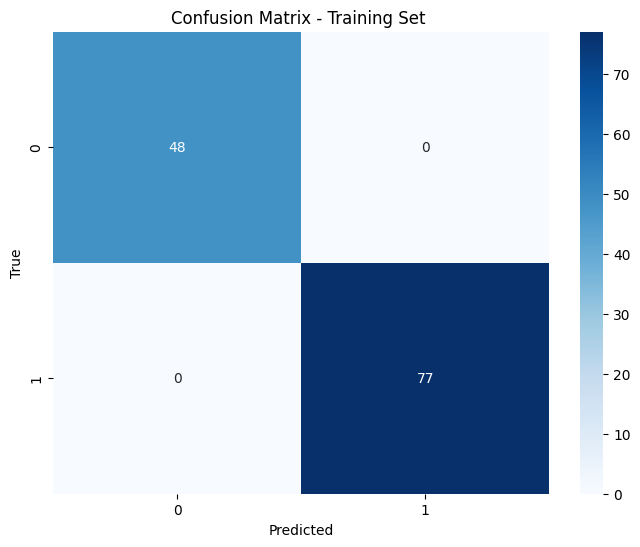

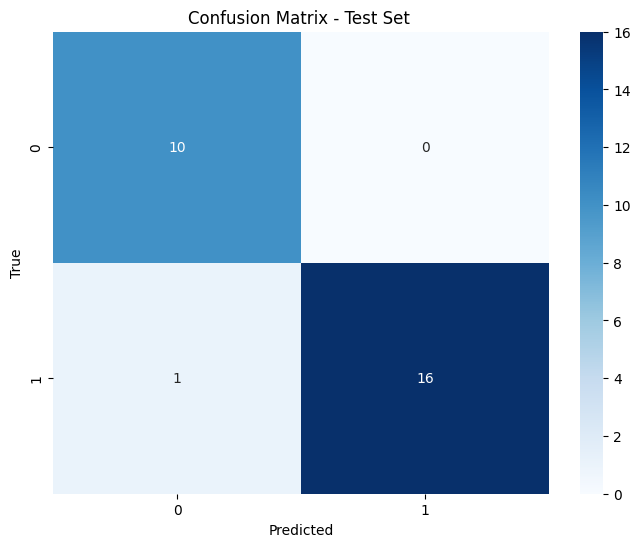

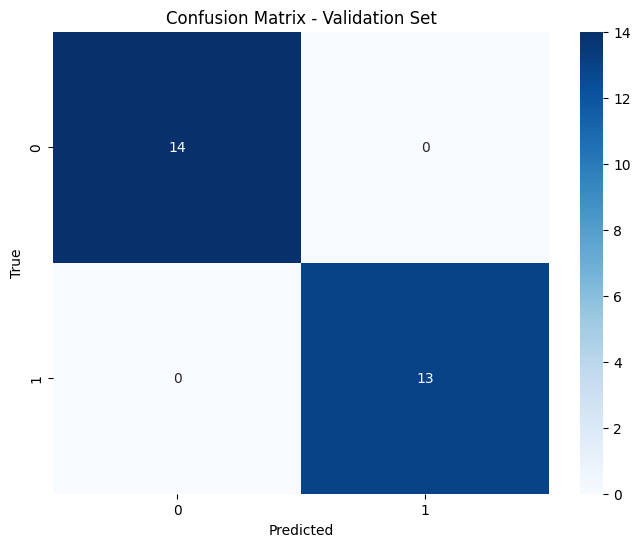

In [26]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

# Initialize the Random Forest classifier
classifier = RandomForestClassifier()

# Train the classifier
classifier.fit(X_train, y_train)

# Predict and evaluate
def evaluate_classifier(classifier, X_train, y_train, X_test, y_test, X_val, y_val):
    y_pred_train = classifier.predict(X_train)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    print(f"Accuracy of train: {accuracy_train:.2f}")
    print(classification_report(y_train, y_pred_train))

    confusion_matrix_train = confusion_matrix(y_train, y_pred_train)
    print(confusion_matrix_train)

    y_pred_test = classifier.predict(X_test)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    print(f"Accuracy of test: {accuracy_test:.2f}")
    print(classification_report(y_test, y_pred_test))

    confusion_matrix_test = confusion_matrix(y_test, y_pred_test)
    print(confusion_matrix_test)

    y_pred_val = classifier.predict(X_val)
    accuracy_val = accuracy_score(y_val, y_pred_val)
    print(f"Accuracy of validation: {accuracy_val:.2f}")
    print(classification_report(y_val, y_pred_val))

    confusion_matrix_val = confusion_matrix(y_val, y_pred_val)
    print(confusion_matrix_val)

    plot_confusion_matrix(confusion_matrix_train, 'Confusion Matrix - Training Set ')
    plot_confusion_matrix(confusion_matrix_test, 'Confusion Matrix - Test Set ')
    plot_confusion_matrix(confusion_matrix_val, 'Confusion Matrix - Validation Set')

evaluate_classifier(classifier, X_train, y_train, X_test, y_test, X_val, y_val)


Gradient Boosting

Accuracy of train: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00        77

    accuracy                           1.00       125
   macro avg       1.00      1.00      1.00       125
weighted avg       1.00      1.00      1.00       125

[[48  0]
 [ 0 77]]
Accuracy of test: 0.96
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.94      0.97        17

    accuracy                           0.96        27
   macro avg       0.95      0.97      0.96        27
weighted avg       0.97      0.96      0.96        27

[[10  0]
 [ 1 16]]
Accuracy of validation: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        13

    accuracy                           1.00        27
   macro avg  

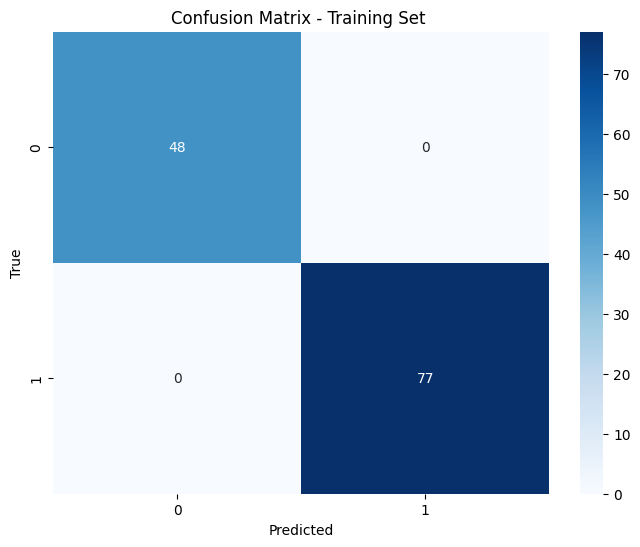

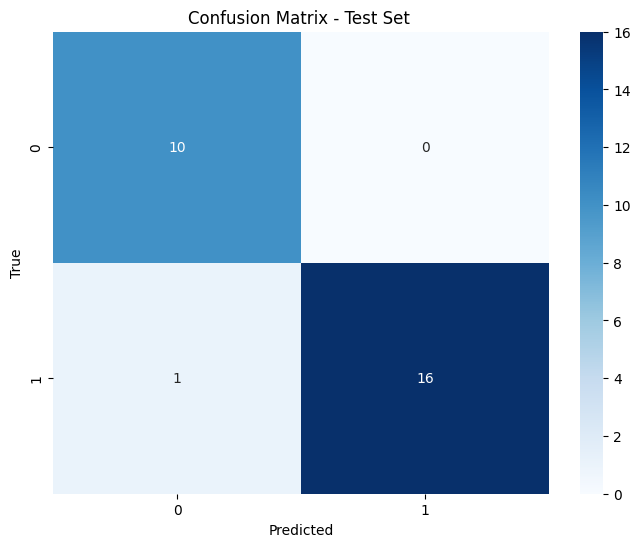

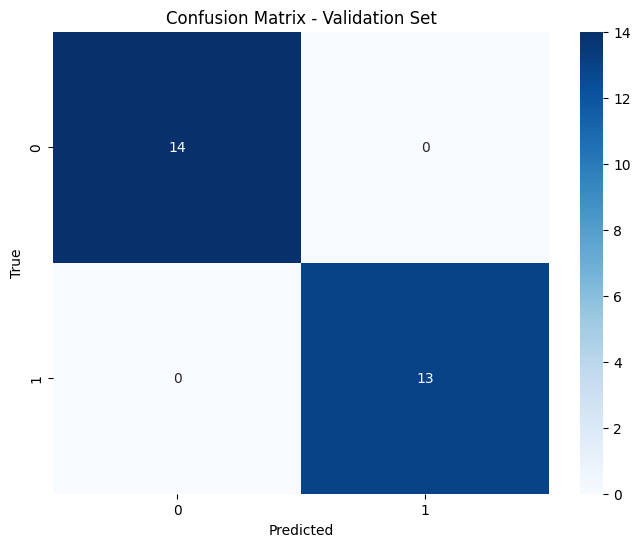

In [27]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting classifier
classifier = GradientBoostingClassifier()

# Train the classifier
classifier.fit(X_train, y_train)

# Evaluate the classifier
evaluate_classifier(classifier, X_train, y_train, X_test, y_test, X_val, y_val)


Decision Tree

Accuracy of train: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00        77

    accuracy                           1.00       125
   macro avg       1.00      1.00      1.00       125
weighted avg       1.00      1.00      1.00       125

[[48  0]
 [ 0 77]]
Accuracy of test: 0.96
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.94      0.97        17

    accuracy                           0.96        27
   macro avg       0.95      0.97      0.96        27
weighted avg       0.97      0.96      0.96        27

[[10  0]
 [ 1 16]]
Accuracy of validation: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        13

    accuracy                           1.00        27
   macro avg  

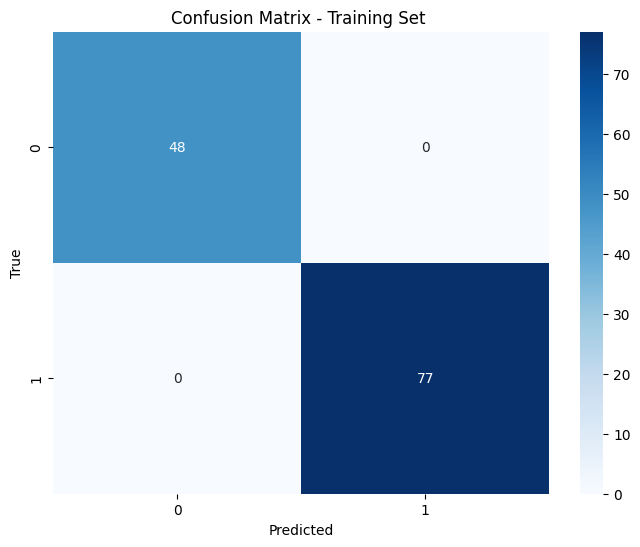

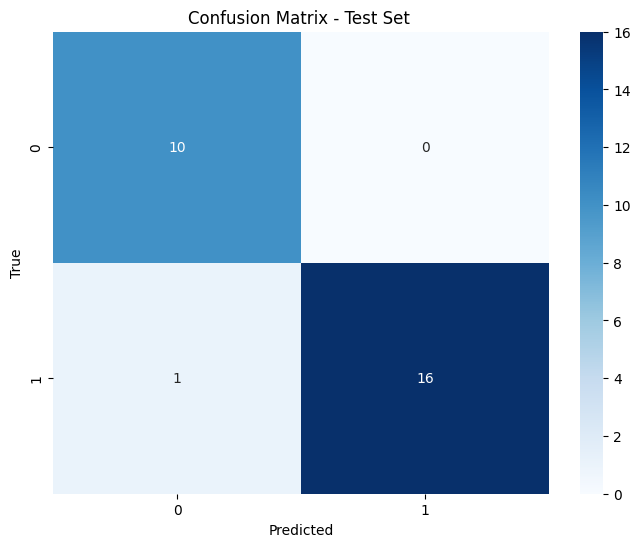

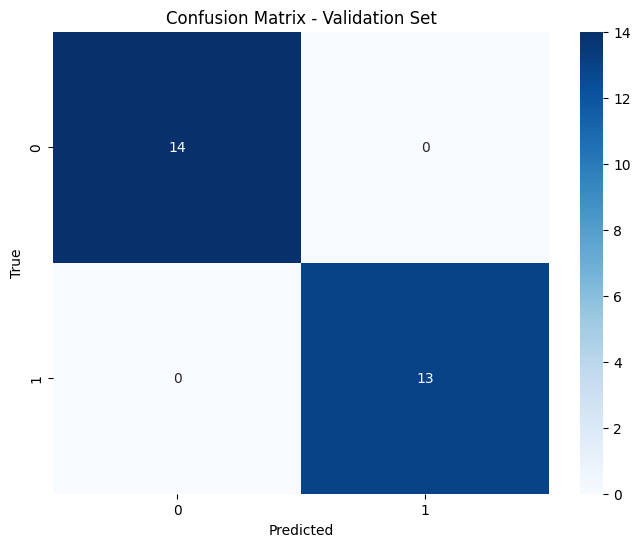

In [28]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree classifier
classifier = DecisionTreeClassifier()

# Train the classifier
classifier.fit(X_train, y_train)

# Evaluate the classifier
evaluate_classifier(classifier, X_train, y_train, X_test, y_test, X_val, y_val)


Naive Bayes

Accuracy of train: 0.98
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        48
           1       0.99      0.97      0.98        77

    accuracy                           0.98       125
   macro avg       0.97      0.98      0.97       125
weighted avg       0.98      0.98      0.98       125

[[47  1]
 [ 2 75]]
Accuracy of test: 0.96
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.94      0.97        17

    accuracy                           0.96        27
   macro avg       0.95      0.97      0.96        27
weighted avg       0.97      0.96      0.96        27

[[10  0]
 [ 1 16]]
Accuracy of validation: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        13

    accuracy                           1.00        27
   macro avg  

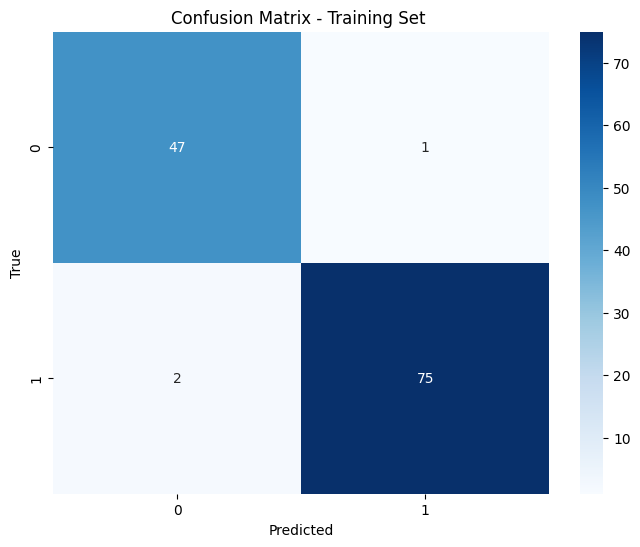

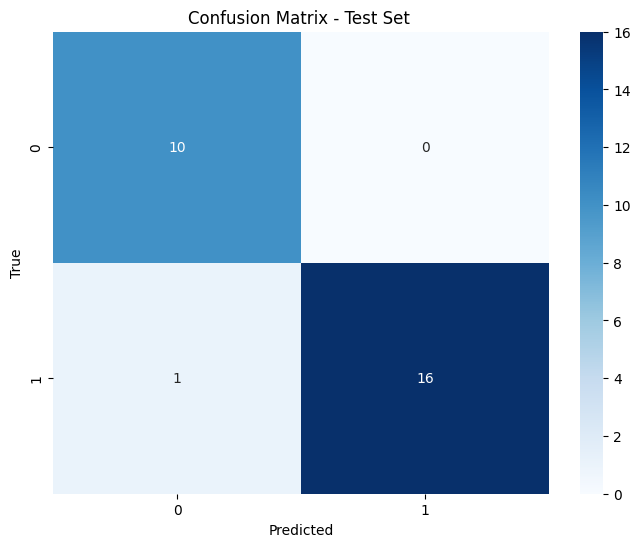

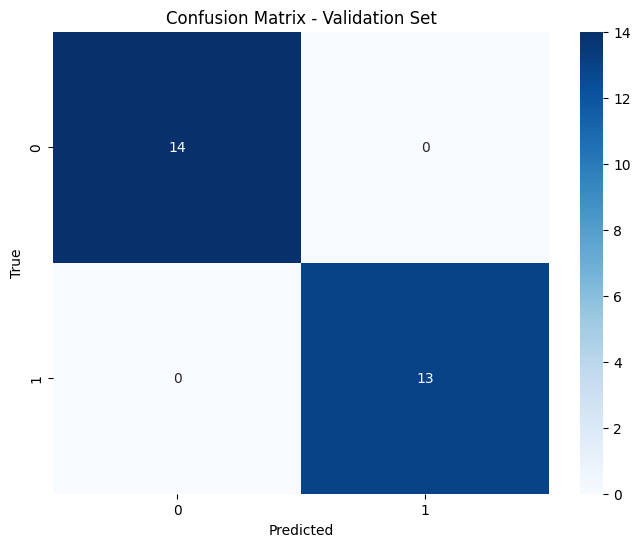

In [29]:
from sklearn.naive_bayes import GaussianNB

# Initialize the Naive Bayes classifier
classifier = GaussianNB()

# Train the classifier
classifier.fit(X_train, y_train)

# Evaluate the classifier
evaluate_classifier(classifier, X_train, y_train, X_test, y_test, X_val, y_val)


Logistic Regression

Accuracy of train: 0.67
              precision    recall  f1-score   support

           0       0.59      0.46      0.52        48
           1       0.70      0.81      0.75        77

    accuracy                           0.67       125
   macro avg       0.65      0.63      0.63       125
weighted avg       0.66      0.67      0.66       125

[[22 26]
 [15 62]]
Accuracy of test: 0.81
              precision    recall  f1-score   support

           0       0.78      0.70      0.74        10
           1       0.83      0.88      0.86        17

    accuracy                           0.81        27
   macro avg       0.81      0.79      0.80        27
weighted avg       0.81      0.81      0.81        27

[[ 7  3]
 [ 2 15]]
Accuracy of validation: 0.63
              precision    recall  f1-score   support

           0       0.70      0.50      0.58        14
           1       0.59      0.77      0.67        13

    accuracy                           0.63        27
   macro avg  

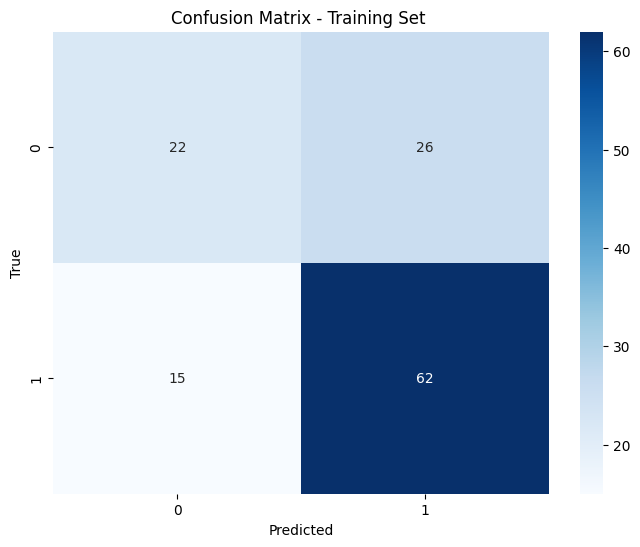

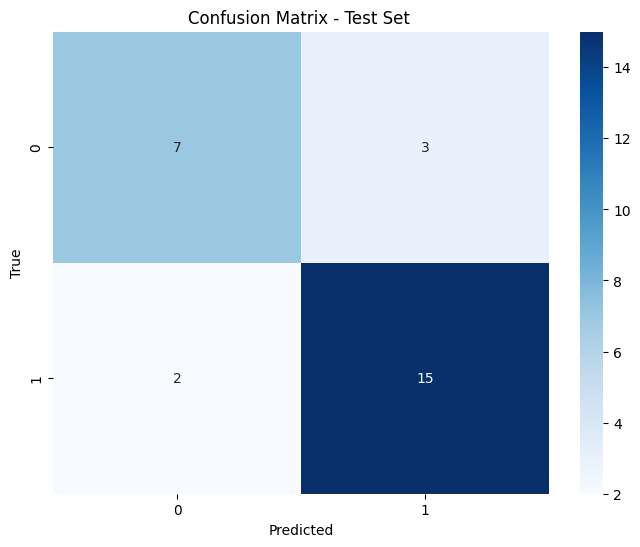

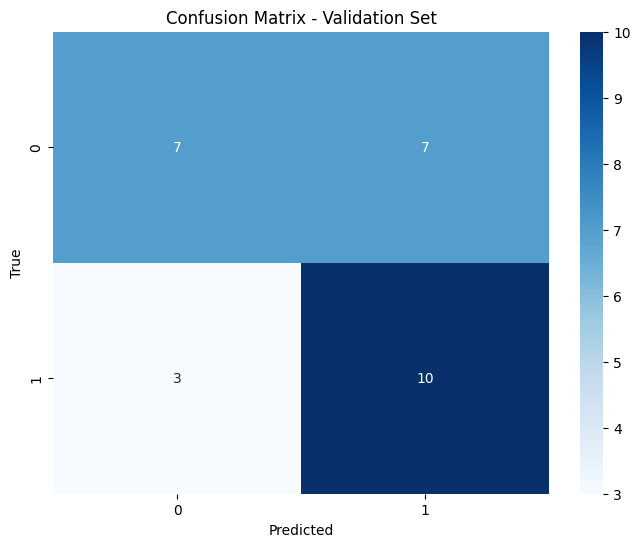

In [30]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression classifier
classifier = LogisticRegression()

# Train the classifier
classifier.fit(X_train, y_train)

# Evaluate the classifier
evaluate_classifier(classifier, X_train, y_train, X_test, y_test, X_val, y_val)


SVM

Accuracy of train: 0.78
              precision    recall  f1-score   support

           0       0.63      1.00      0.77        48
           1       1.00      0.64      0.78        77

    accuracy                           0.78       125
   macro avg       0.82      0.82      0.78       125
weighted avg       0.86      0.78      0.78       125

[[48  0]
 [28 49]]
Accuracy of test: 0.74
              precision    recall  f1-score   support

           0       0.59      1.00      0.74        10
           1       1.00      0.59      0.74        17

    accuracy                           0.74        27
   macro avg       0.79      0.79      0.74        27
weighted avg       0.85      0.74      0.74        27

[[10  0]
 [ 7 10]]
Accuracy of validation: 0.78
              precision    recall  f1-score   support

           0       0.70      1.00      0.82        14
           1       1.00      0.54      0.70        13

    accuracy                           0.78        27
   macro avg  

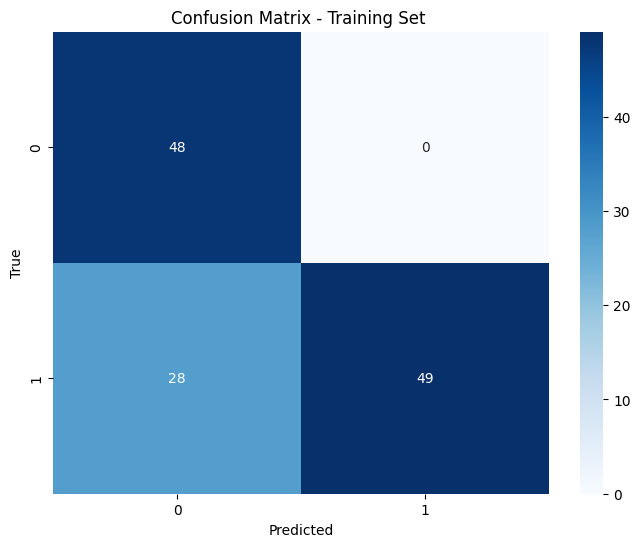

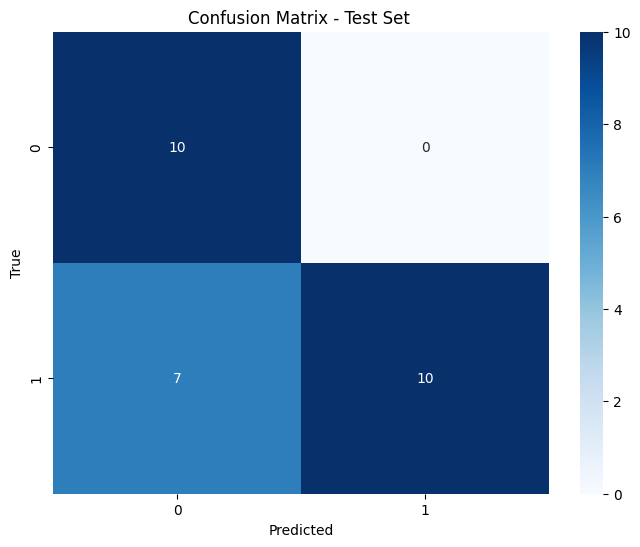

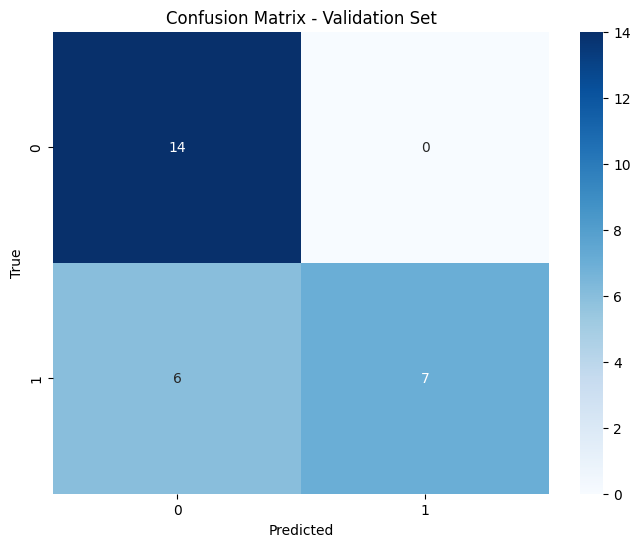

In [31]:
from sklearn.svm import SVC

# Initialize the SVM classifier
classifier = SVC()

# Train the classifier
classifier.fit(X_train, y_train)

# Evaluate the classifier
evaluate_classifier(classifier, X_train, y_train, X_test, y_test, X_val, y_val)


XG BOOST

Accuracy of train: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00        77

    accuracy                           1.00       125
   macro avg       1.00      1.00      1.00       125
weighted avg       1.00      1.00      1.00       125

[[48  0]
 [ 0 77]]
Accuracy of test: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        17

    accuracy                           1.00        27
   macro avg       1.00      1.00      1.00        27
weighted avg       1.00      1.00      1.00        27

[[10  0]
 [ 0 17]]
Accuracy of validation: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        13

    accuracy                           1.00        27
   macro avg  

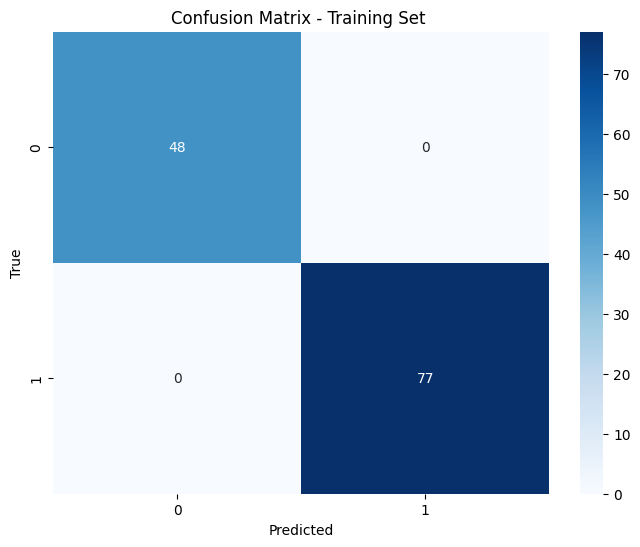

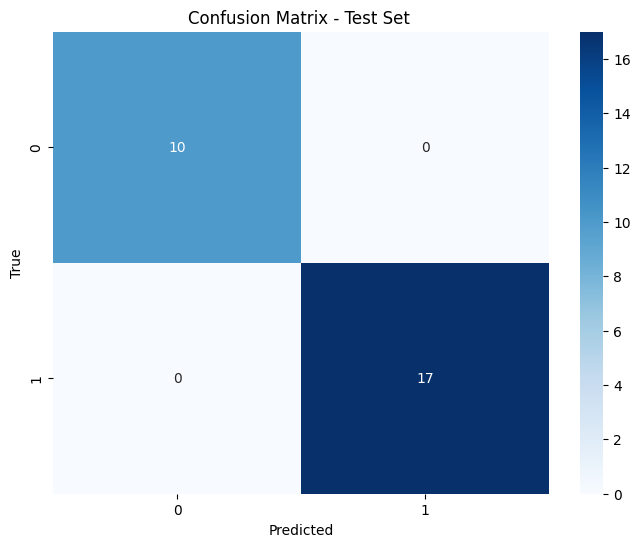

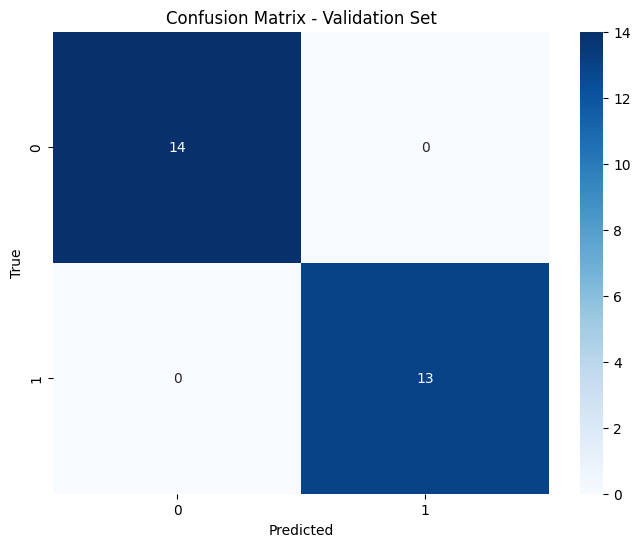

In [32]:
import xgboost as xgb

# Initialize the XGBoost classifier
classifier = xgb.XGBClassifier()

# Train the classifier
classifier.fit(X_train, y_train)

# Evaluate the classifier
evaluate_classifier(classifier, X_train, y_train, X_test, y_test, X_val, y_val)


ADABOOST

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy of train: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00        77

    accuracy                           1.00       125
   macro avg       1.00      1.00      1.00       125
weighted avg       1.00      1.00      1.00       125

[[48  0]
 [ 0 77]]
Accuracy of test: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        17

    accuracy                           1.00        27
   macro avg       1.00      1.00      1.00        27
weighted avg       1.00      1.00      1.00        27

[[10  0]
 [ 0 17]]
Accuracy of validation: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        13

    accuracy                           1.00        27
   macro avg  

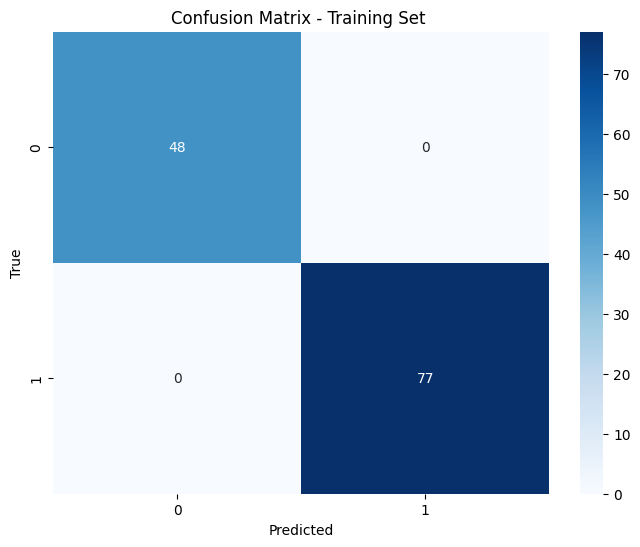

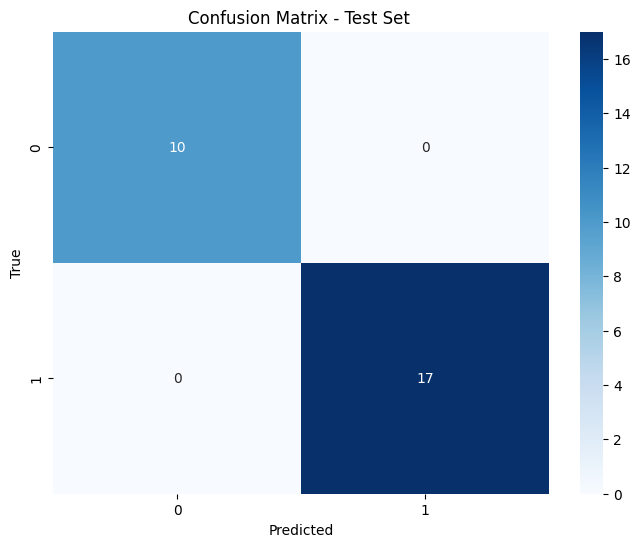

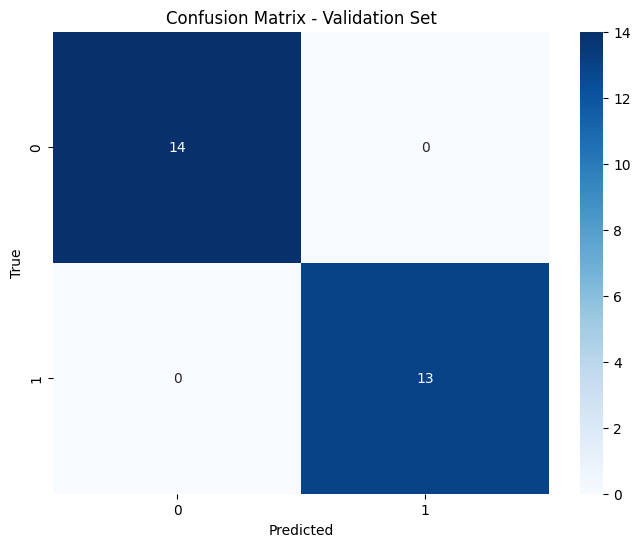

In [33]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize the AdaBoost classifier
classifier = AdaBoostClassifier()

# Train the classifier
classifier.fit(X_train, y_train)

# Evaluate the classifier
evaluate_classifier(classifier, X_train, y_train, X_test, y_test, X_val, y_val)


Extra Trees

Accuracy of train: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00        77

    accuracy                           1.00       125
   macro avg       1.00      1.00      1.00       125
weighted avg       1.00      1.00      1.00       125

[[48  0]
 [ 0 77]]
Accuracy of test: 0.96
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.94      0.97        17

    accuracy                           0.96        27
   macro avg       0.95      0.97      0.96        27
weighted avg       0.97      0.96      0.96        27

[[10  0]
 [ 1 16]]
Accuracy of validation: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        13

    accuracy                           1.00        27
   macro avg  

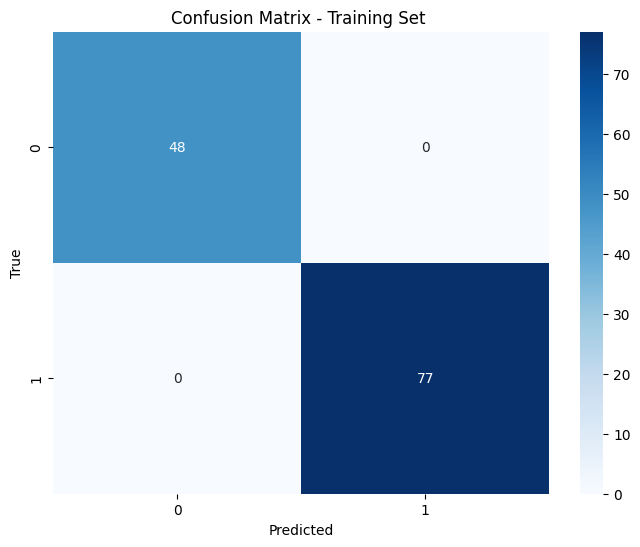

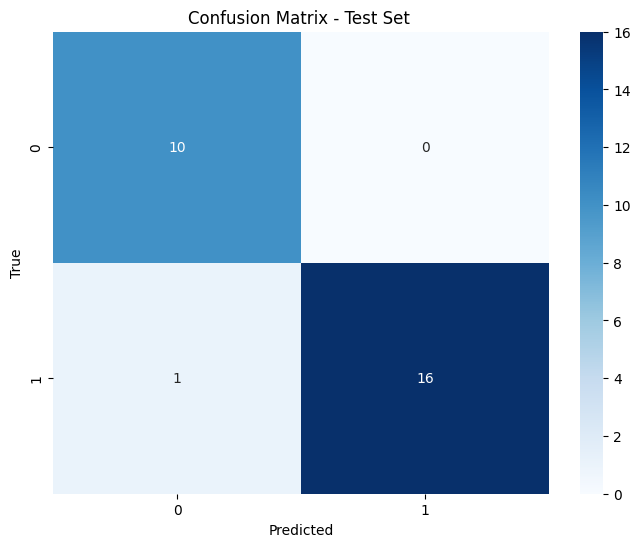

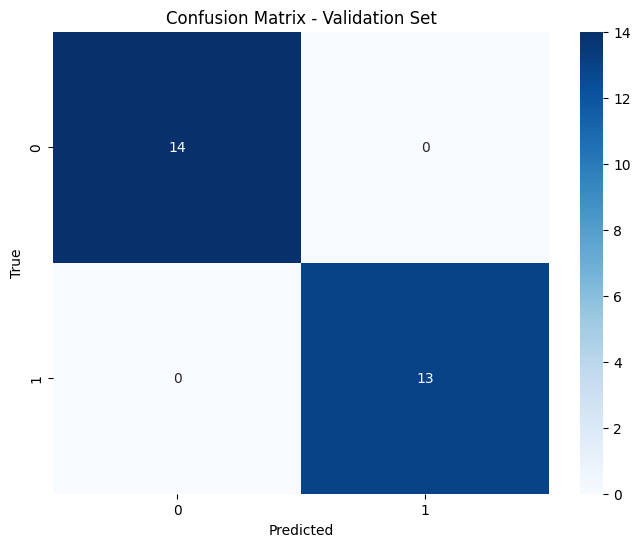

In [34]:
from sklearn.ensemble import ExtraTreesClassifier

# Initialize the Extra Trees classifier
classifier = ExtraTreesClassifier()

# Train the classifier
classifier.fit(X_train, y_train)

# Evaluate the classifier
evaluate_classifier(classifier, X_train, y_train, X_test, y_test, X_val, y_val)


ROC and AUC



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


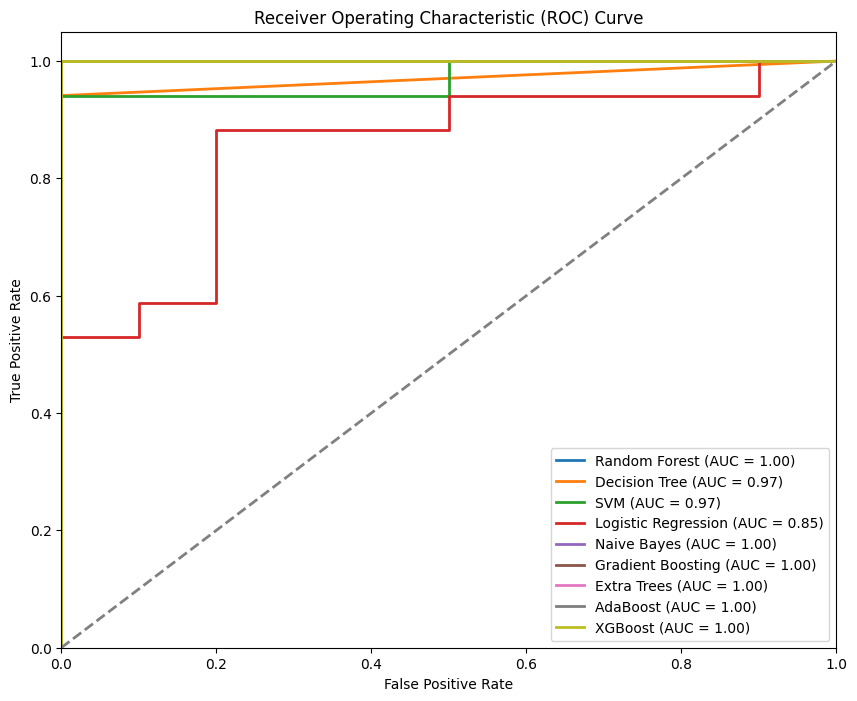

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

# Function to plot ROC curve
def plot_roc_curve(fpr, tpr, roc_auc, label):
    plt.plot(fpr, tpr, lw=2, label=f'{label} (AUC = {roc_auc:.2f})')

# Initialize classifiers
classifiers = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(probability=True),
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Extra Trees": ExtraTreesClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "XGBoost": xgb.XGBClassifier()
}

plt.figure(figsize=(10, 8))

# Compute ROC curve and ROC area for each classifier
for name, clf in classifiers.items():
    # Train the classifier
    clf.fit(X_train, y_train)

    # Predict probabilities
    y_pred_proba = clf.predict_proba(X_test)[:, 1]

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plot_roc_curve(fpr, tpr, roc_auc, name)

# Plot ROC curve for random guessing (diagonal line)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')

# Set plot parameters
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
